In [3]:
import os
os.chdir("..") # Change wd to root for easy dev

In [4]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
from bwypy import Bwypy
from bwypy import QueryBuilder, AND, OR
import matplotlib.pyplot as plt

In [5]:
# Set logging
import logging
logger = logging.getLogger()
logger.setLevel(logging.DEBUG)

In [6]:
endpoint = "http://bookworm.htrc.illinois.edu/cgi-bin/dbbindings.py"
database = "hathipd"
bw = Bwypy(endpoint=endpoint, db=database)

In [7]:
# Set up Query Builder
fieldl = bw.fields["dbname"].tolist()
qb = QueryBuilder(fieldl)
query = qb.search_limits(qb.date_year > 0).groups(qb.date_year, qb.lc_classes).query
query

DEBUG:root:Query time: 0s


{'groups': [u'date_year', u'lc_classes'],
 'search_limits': [{u'date_year': {'$gt': 0}}]}

In [21]:
# Get languages stats
q = bw.default.copy()
q.update(query)
print q
a = bw.search(q)
a.sort("TextCount", ascending=False).head()

DEBUG:root:{'counttype': ['TextCount', 'WordCount'], 'search_limits': [{u'date_year': {'$gt': 0}}], 'groups': [u'date_year', u'lc_classes'], 'database': 'hathipd', 'words_collation': 'Case_Sensitive', 'method': 'return_json', 'compare_limits': []}
DEBUG:root:Query time: 0s


{'counttype': ['TextCount', 'WordCount'], 'search_limits': [{u'date_year': {'$gt': 0}}], 'groups': [u'date_year', u'lc_classes'], 'database': 'hathipd', 'words_collation': 'Case_Sensitive', 'method': 'return_json', 'compare_limits': []}


,,TextCount,WordCount
date_year,lc_classes,,
1900,unknown,62016,6939936617
1800,unknown,34635,7158134581
1000,unknown,30773,7025088079
1906,unknown,28270,3642357741
1907,unknown,27505,3312149751


In [22]:
b = a.reset_index()
b["pre-1923"] = b["date_year"] < 1923
c = b[["pre-1923", "lc_classes", "TextCount"]].groupby(["pre-1923", "lc_classes"]).sum()
c

TextCount
pre-1923 lc_classes                                                                           
False    Agriculture                                                                     24628
         Auxiliary Sciences of History                                                    5047
         Bibliography, Library Science, and General Information Resources                16485
         Education                                                                       11223
         Fine Arts                                                                        4055
         General Works                                                                    1576
         General and Old World History                                                   10207
         Geography, Anthropology, and Recreation                                          8639
         History of America                                                               8118
         History of the United States and British, Dutch, French, and Latin America       6662
         Language and Literature                                                         11542
         Law                                                                             35533
         Medicine                                                                        13302
         Military Science                                                                 9306
         Music                                                                            2878
         Naval Science                                                                    3668
         Philosophy, Psychology, and Religion                                             6650
         Political Science                                                               15324
         Science                                                                         26991
         Social Sciences                                                                 75214
         Technology                                                                      40524
         unknown                                                                        288936
True     Agriculture                                                                     57866
         Auxiliary Sciences of History                                                   20874
         Bibliography, Library Science, and General Information Resources                39446
         Education                                                                       47721
         Fine Arts                                                                       38006
         General Works                                                                  106939
         General and Old World History                                                  234785
         Geography, Anthropology, and Recreation                                         29972
         History of America                                                              68063
         History of the United States and British, Dutch, French, and Latin America      98823
         Language and Literature                                                        373533
         Law                                                                             91201
         Medicine                                                                        41417
         Military Science                                                                12096
         Music                                                                           33735
         Naval Science                                                                    6259
         Philosophy, Psychology, and Religion                                           156295
         Political Science                                                               66252
         Science                                                                        157460


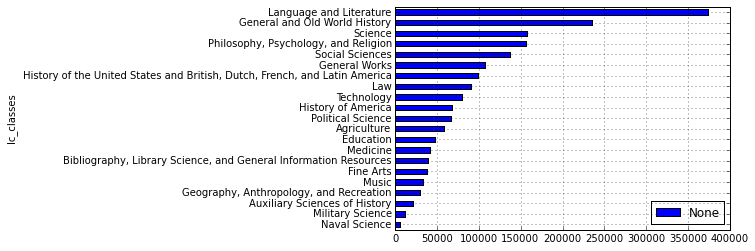

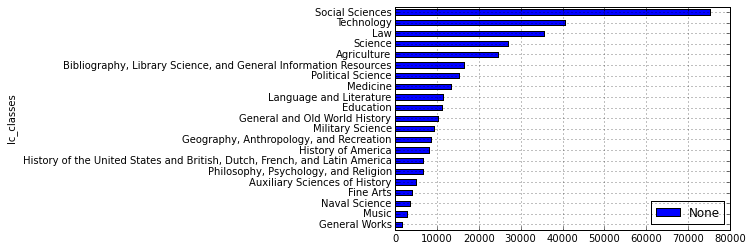

In [23]:
c = c.reset_index()
c = c[c.lc_classes != "unknown"]
c[c["pre-1923"]==True][["lc_classes", "TextCount"]].sort("TextCount").plot(kind="barh", x="lc_classes", y="TextCount")
c[c["pre-1923"]==False][["lc_classes", "TextCount"]].sort("TextCount").plot(kind="barh", x="lc_classes", y="TextCount")

In [25]:
#plt.figure()
from plotSlope import slope

In [26]:
#Pre data for slopegraph
d = c.pivot(index="lc_classes", columns="pre-1923", values="TextCount").reindex_axis([True, False], axis=1)
d.columns = ["pre-1923", "1923-"]
e = 100* d / d.apply(lambda x: x.sum())

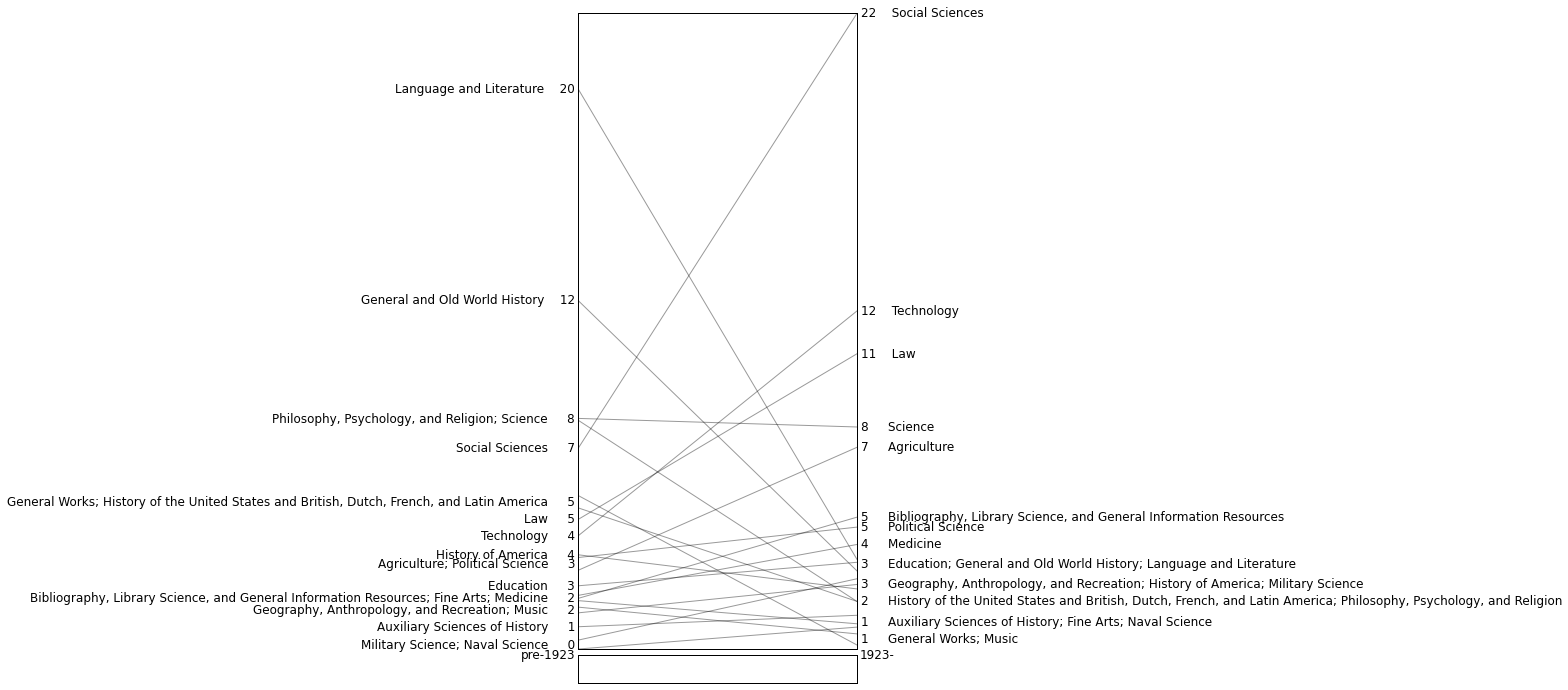

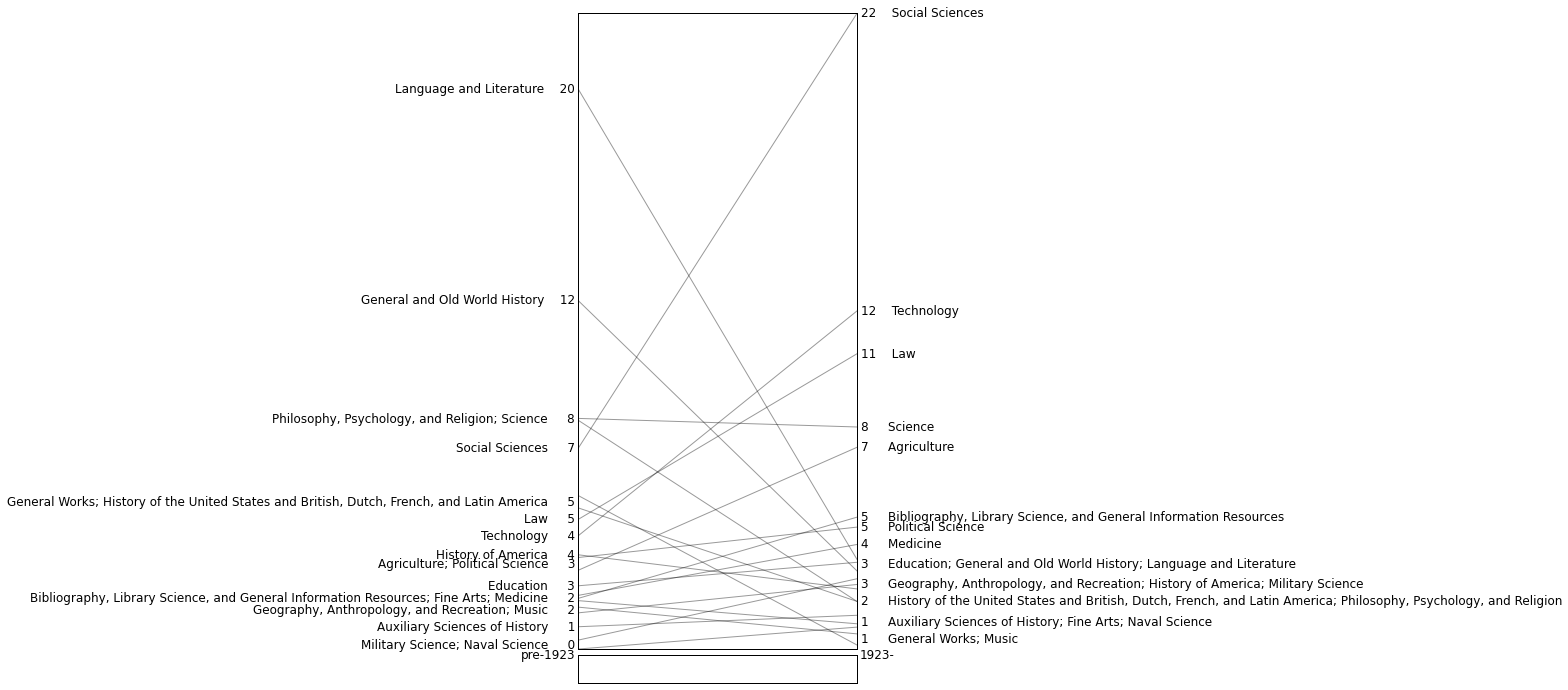

In [28]:
# Draw slopegraph
slope(e,width =5,height= 12,kind='interval',
          font_size=12, dpi=100)

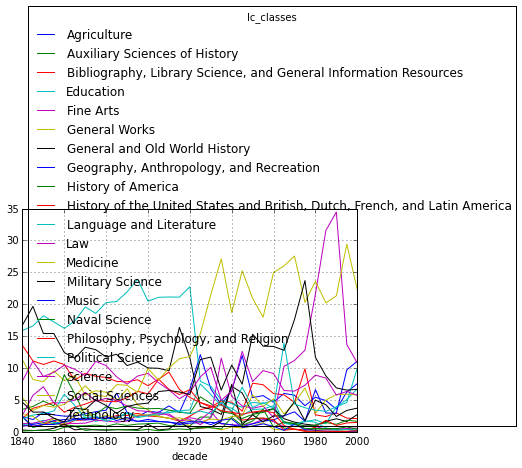

In [123]:
# Look at Class proportions by decade, leading to 1923
a.sort("TextCount", ascending=False).head()
decades = a.reset_index()
# Trim to 1860-1922, inclusive
decades = decades[(1840 <= decades['date_year']) & (decades['date_year'] <= 2000)]
# Remove unknowns
decades = decades[decades.lc_classes != "unknown"]
# Sum up by decade
decades['decade'] = (decades['date_year'] - (decades['date_year'] % 5))
decades = decades[["lc_classes", "decade", "TextCount"]].groupby(["decade", "lc_classes"]).sum().reset_index()
# Pivot from long to wide format
decades = decades.pivot(index="lc_classes", columns="decade", values="TextCount")
# Convert to proportion
decades = 100* decades / decades.apply(lambda x: x.sum())
decades.transpose().plot()

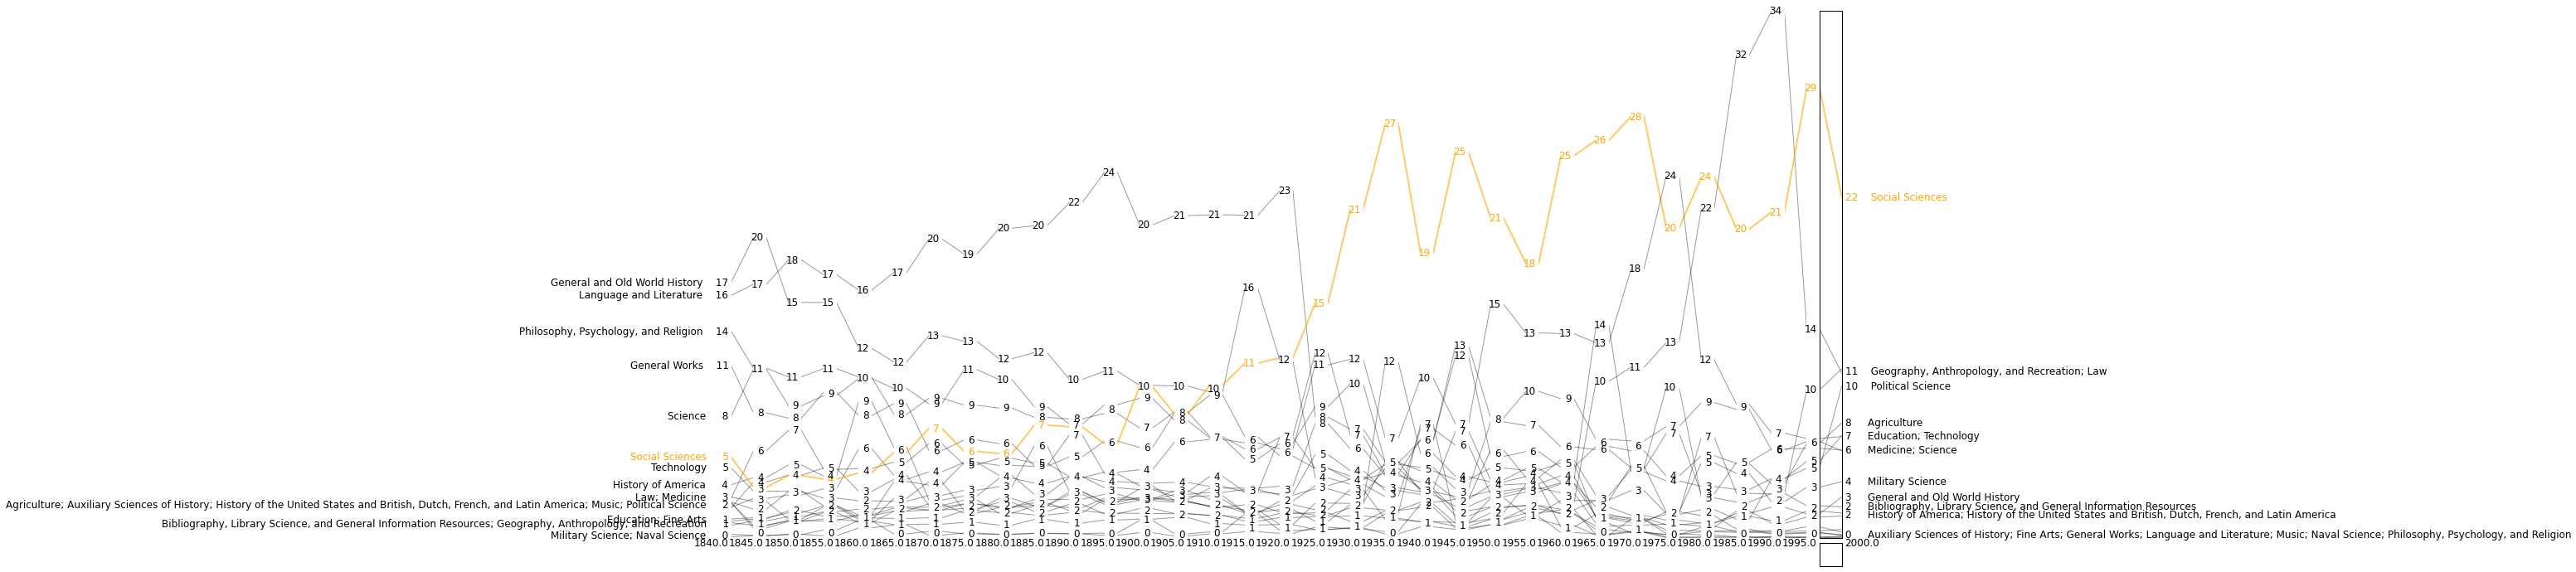

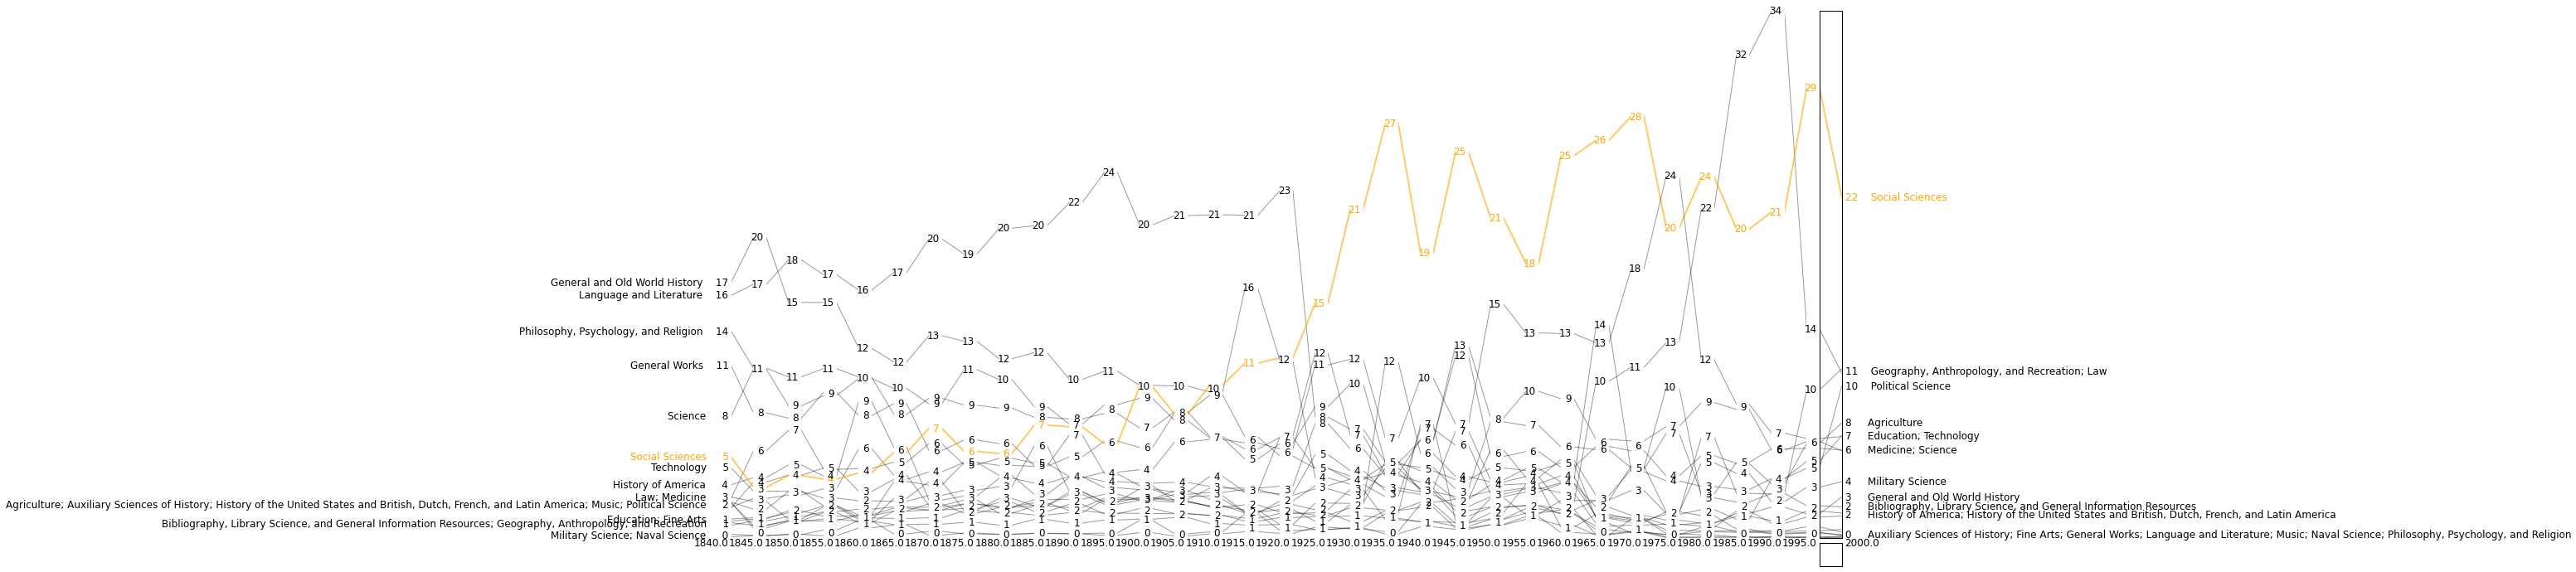

In [124]:
slope(decades,width =24,height= 12,kind='interval', color={"Social Sciences":"orange", "Languages and Literature": "blue"},
          font_size=12, dpi=100)
#d.columns = ["pre-1923", "1923-"]

DEBUG:root:{'counttype': ['TextCount'], 'search_limits': [{'date_year': {'$gte': 0}}], 'groups': ['date_year'], 'database': 'hathipd', 'words_collation': 'Case_Sensitive', 'method': 'return_json', 'compare_limits': []}
DEBUG:root:Query time: 0s


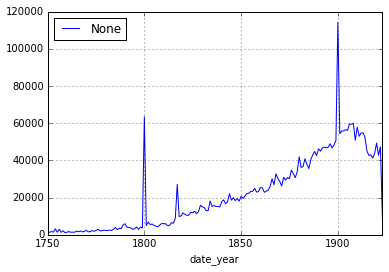

In [14]:
# Plot language
q = bw.default.copy()
q['search_limits'] = [{"date_year":{"$gte":0}}]
q['groups'] = ["date_year"]
q['counttype'] = ['TextCount']
a = bw.search(q)
a.sort(ascending=True, inplace=True)
a.loc[1750:1923].reset_index().plot(x="date_year", y="TextCount")